#Protótipo 1


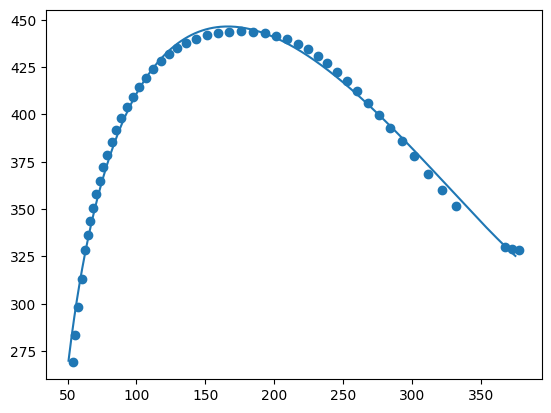

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import re

def extract_points(eps):
    X = []
    Y = []

    # Regular expression to match the coordinates before the 'p' command.
    points_pattern = r"(\d+(\.\d+)?)\s+(\d+(\.\d+)?) p"

    matches = re.findall(points_pattern, eps)
    for match in matches:
        X.append(float(match[0]))
        Y.append(float(match[2]))
    return np.array(X), np.array(Y)


def dist(x1, y1, x2, y2):
    return np.linalg.norm(np.array([x1, y1]) - np.array([x2, y1]))


# Pegar os pontos
with open('/content/example.eps', 'r') as f:
    eps = f.read()


X, Y = extract_points(eps)

# Fixar 'n' para testar
n = 50

X = X[2:n + 3]
Y = Y[2:n + 3]


# t_i
T = [0]
s = 0

for i in range(n):
    s += dist(X[i + 1], Y[i + 1], X[i], Y[i])
    T.append(s)

# T final
T = np.array(T) / s


for i in range(10):
    T_matrix = np.vstack([np.ones(n+1), T**1, T**2, T**3]).T
    Bx = np.linalg.lstsq(T_matrix, X, rcond=None)[0]
    By = np.linalg.lstsq(T_matrix, Y, rcond=None)[0]

    # Primeira derivada
    d1_Bx = np.array([Bx[1], 2 * Bx[2], 3 * Bx[3]])
    d1_By = np.array([By[1], 2 * By[2], 3 * By[3]])

    # Segunda derivada
    d2_Bx = np.array([d1_Bx[1], 2 * d1_Bx[2]])
    d2_By = np.array([d1_By[1], 2 * d1_By[2]])

    for j in range(len(T)):
        # X(t)
        X1 = Bx[0] + (Bx[1] * T[j]) + (Bx[2] * T[j]**2) + (Bx[3] * T[j]**3)
        Y1 = By[0] + (By[1] * T[j]) + (By[2] * T[j]**2) + (By[3] * T[j]**3)
        # X'(t)
        X2 = d1_Bx[0] + (d1_Bx[1] * T[j]) + (d1_Bx[2] * T[j]**2)
        Y2 = d1_By[0] + (d1_By[1] * T[j]) + (d1_By[2] * T[j]**2)
        # X''(t)
        X3 = d2_Bx[0] + (d2_Bx[1] * T[j])
        Y3 = d2_By[0] + (d2_By[1] * T[j])
        # f(t)
        f = (X1 - X[j]) * X2 + (Y1 - Y[j]) * Y2
        # f'(t)
        d1_f = X2**2 + Y2**2 + (X1 - X[j]) * X3 + (Y1 - Y[j]) * Y3
        # t <- t - f(t)/f'(t)
        T[j] -= f / d1_f
    # Garante que 0 <= t <= 1 e que 0 e 1 estejam em T
    T = (T - np.min(T)) / np.max(T)

    # Valores de t
    t = np.linspace(0, 1, 400)  # Adjust range as needed

    # Calcular x e y usando o polinomio
    x = Bx[0] + (Bx[1] * t) + (Bx[2] * t**2) + (Bx[3] * t**3)
    y = By[0] + (By[1] * t) + (By[2] * t**2) + (By[3] * t**3)

    # Colocar pontos na figura
    plt.scatter(X, Y)

    # Plotar e salvar figura
    plt.plot(x, y, label='Curva')
    plt.savefig(f'curva_{n}p_{i}.png')

    # Limpar figura
    plt.clf()


plt.scatter(X, Y)

plt.plot(x, y, label='Curva')
plt.show()

